<a href="https://colab.research.google.com/github/marllinkang/dl_project/blob/main/snack_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pwd

'/content'

In [ ]:
!unzip -qq "/content/drive/MyDrive/test _ws/deep learning/snack_unfilled _test _2800.(copy).zip"

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
path = "/content/snack_unfilled _test _2800.(copy)/"
os.listdir(path)

['snack.unfilled.3992.jpg',
 'snack.unfilled.9273.jpg',
 'snack.unfilled.8139.jpg',
 'snack.unfilled.9163.jpg',
 'snack.unfilled.4863.jpg',
 'snack.unfilled.6073.jpg',
 'snack.unfilled.4016.jpg',
 'snack.unfilled.8079.jpg',
 'snack.unfilled.4694.jpg',
 'snack.unfilled.9210.jpg',
 'snack.filled.1941.jpg',
 'snack.unfilled.5935.jpg',
 'snack.unfilled.8044.jpg',
 'snack.unfilled.5928.jpg',
 'snack.filled.1965.jpg',
 'snack.filled.1610.jpg',
 'snack.unfilled.5955.jpg',
 'snack.unfilled.4567.jpg',
 'snack.unfilled.4610.jpg',
 'snack.unfilled.6043.jpg',
 'snack.unfilled.4085.jpg',
 'snack.unfilled.9331.jpg',
 'snack.unfilled.8004.jpg',
 'snack.unfilled.3928.jpg',
 'snack.unfilled.4888.jpg',
 'snack.unfilled.4872.jpg',
 'snack.filled.1546.jpg',
 'snack.unfilled.3948.jpg',
 'snack.unfilled.3919.jpg',
 'snack.unfilled.5497.jpg',
 'snack.filled.1577.jpg',
 'snack.filled.2086.jpg',
 'snack.filled.2436.jpg',
 'snack.filled.1792.jpg',
 'snack.unfilled.3910.jpg',
 'snack.unfilled.8250.jpg',
 'snack.

In [ ]:
snack_names = os.listdir(path)
snack_labels = [each.split('.')[1] for each in snack_names]
snack_id =[each.split('.')[2] for each in snack_names]

In [ ]:
len(snack_names)

2883

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

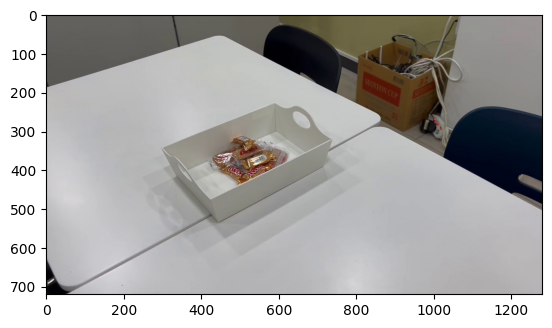

In [ ]:
sample = random.choice(snack_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

In [ ]:
sample = random.choice(snack_names)
image = mpimg.imread(path+ sample)
image.shape

(720, 1280, 3)

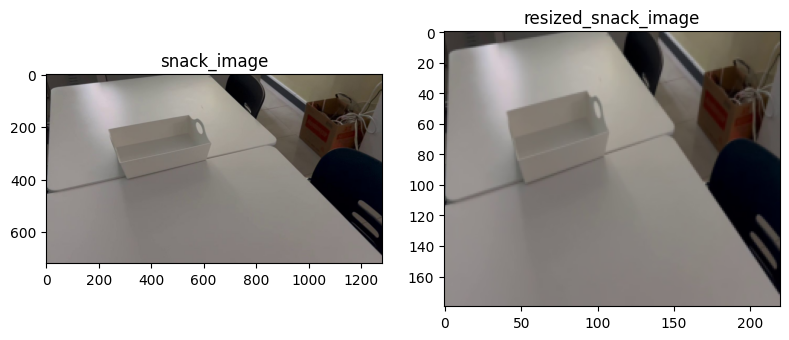

In [ ]:
from skimage.transform import resize
resized = resize(image, (180, 220, 3)) #300, 300 크기로 변경

fig, axes = plt.subplots(1, 2, figsize =(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title("snack_image")
ax[1].imshow(resized, cmap =plt.cm.gray)
ax[1].set_title("resized_snack_image")

fig.tight_layout()
plt.show()

In [ ]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(snack_names)
for file in bar_total:
    image = mpimg.imread(path+file)
    images.append(resize(image, (180, 220, 3)))

images = np.array(images)

  0%|          | 0/2883 [00:00<?, ?it/s]

In [ ]:
images.shape, snack_names[:5]

((2883, 180, 220, 3),
 ['snack.unfilled.3992.jpg',
  'snack.unfilled.9273.jpg',
  'snack.unfilled.8139.jpg',
  'snack.unfilled.9163.jpg',
  'snack.unfilled.4863.jpg'])

In [ ]:
images[:3]

array([[[[8.43732147e-02, 6.21607858e-02, 7.72490422e-02],
         [2.53843679e-02, 6.87542245e-03, 4.57143181e-02],
         [1.48460475e-02, 3.82127005e-03, 4.00027426e-02],
         ...,
         [2.33552761e-01, 2.36406978e-01, 2.10742864e-01],
         [2.31383563e-01, 2.35299625e-01, 2.11759199e-01],
         [2.31372549e-01, 2.35294118e-01, 2.11764706e-01]],

        [[1.50355668e-01, 1.29468011e-01, 1.33932395e-01],
         [3.16438753e-02, 1.34147562e-02, 4.84258022e-02],
         [1.49769424e-02, 3.95606207e-03, 4.14218093e-02],
         ...,
         [2.33578490e-01, 2.36432708e-01, 2.10768593e-01],
         [2.31385168e-01, 2.35301229e-01, 2.11760803e-01],
         [2.31372593e-01, 2.35294162e-01, 2.11764750e-01]],

        [[2.42191003e-01, 2.23886202e-01, 2.11745998e-01],
         [4.53107251e-02, 2.74058094e-02, 5.51867284e-02],
         [1.52615295e-02, 4.25994456e-03, 4.19837141e-02],
         ...,
         [2.35084169e-01, 2.37938132e-01, 2.12274145e-01],
         [

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(snack_labels)
snack_labels_encoded = encoder.transform(snack_labels)
snack_labels_encoded[:3], encoder.classes_

(array([1, 1, 1]), array(['filled', 'unfilled'], dtype='<U8'))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test =\
                train_test_split(images, snack_labels_encoded, test_size =0.2,
                                 random_state = 13, stratify  = snack_labels_encoded)
X_train.shape, X_test.shape

((2306, 180, 220, 3), (577, 180, 220, 3))

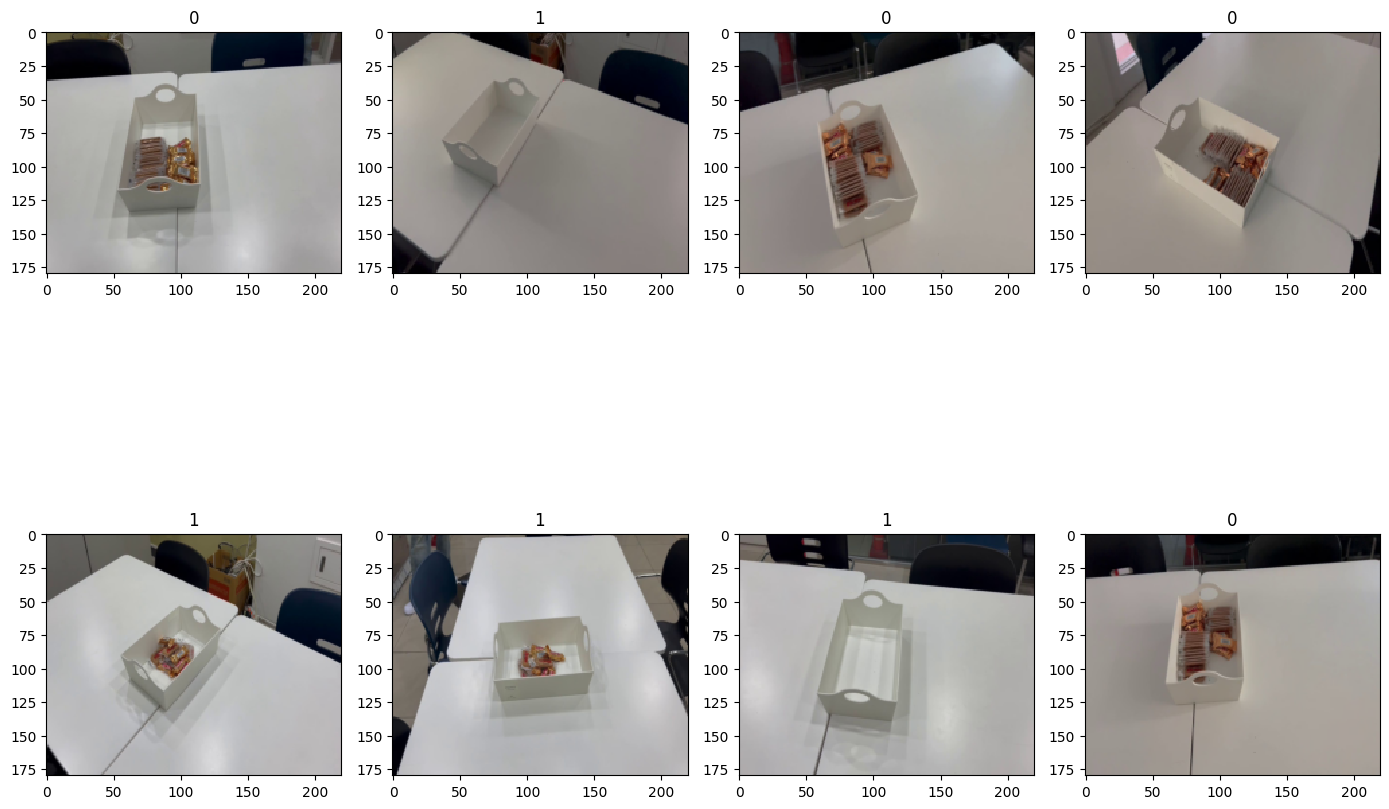

In [ ]:
samples = random.choices(population = range(0, 244), k =8 )

plt.figure(figsize =(14,12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n], cmap ='Greys',interpolation = 'nearest')
    plt.title(y_train[n])

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([layers.Conv2D(32,(3,3), activation ='relu', input_shape=(180,220,3)),
                           layers.MaxPooling2D(pool_size=(2,2), strides =(2,2)),
                           layers.Dropout(0.25),

                           layers.Conv2D(64,(3,3), activation='relu',padding ='same'),
                           layers.MaxPooling2D(pool_size=(2,2)),
                           layers.Dropout(0.25),

                           layers.Conv2D(64,(3,3), activation='relu',padding ='same'),
                           layers.MaxPooling2D(pool_size=(2,2)),
                           layers.Dropout(0.25),

                           layers.Flatten(),
                           layers.Dense(512, activation ='relu'),
                           layers.Dropout(0.25),
                           layers.Dense(2, activation ='softmax')])



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 218, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 109, 32)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 89, 109, 32)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 89, 109, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 44, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 44, 54, 64)        0

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import time

start_time = time.time()
hist = model.fit(X_train.reshape(2306, 180, 220, 3), y_train,
                 epochs = 10, verbose =1, #처음 5번
                 validation_data = (X_test.reshape(577, 180, 220, 3), y_test))
print("fit time :", time.time() - start_time)

Epoch 1/10
73/73 [==============================] - 125s 2s/step - loss: 1.0256 - accuracy: 0.6418 - val_loss: 0.5421 - val_accuracy: 0.7452
Epoch 2/10
73/73 [==============================] - 126s 2s/step - loss: 0.2105 - accuracy: 0.9050 - val_loss: 0.0381 - val_accuracy: 0.9879
Epoch 3/10
73/73 [==============================] - 124s 2s/step - loss: 0.0171 - accuracy: 0.9935 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/10
73/73 [==============================] - 125s 2s/step - loss: 0.0041 - accuracy: 0.9996 - val_loss: 5.7585e-04 - val_accuracy: 1.0000
Epoch 5/10
73/73 [==============================] - 129s 2s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 0.9965
Epoch 6/10
73/73 [==============================] - 127s 2s/step - loss: 0.1147 - accuracy: 0.9566 - val_loss: 0.1383 - val_accuracy: 0.9515
Epoch 7/10
73/73 [==============================] - 125s 2s/step - loss: 0.0517 - accuracy: 0.9844 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 8/1

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

19/19 [==============================] - 7s 392ms/step - loss: 1.3578e-04 - accuracy: 1.0000
Test loss : 0.0001357831060886383
Test accuracy : 1.0


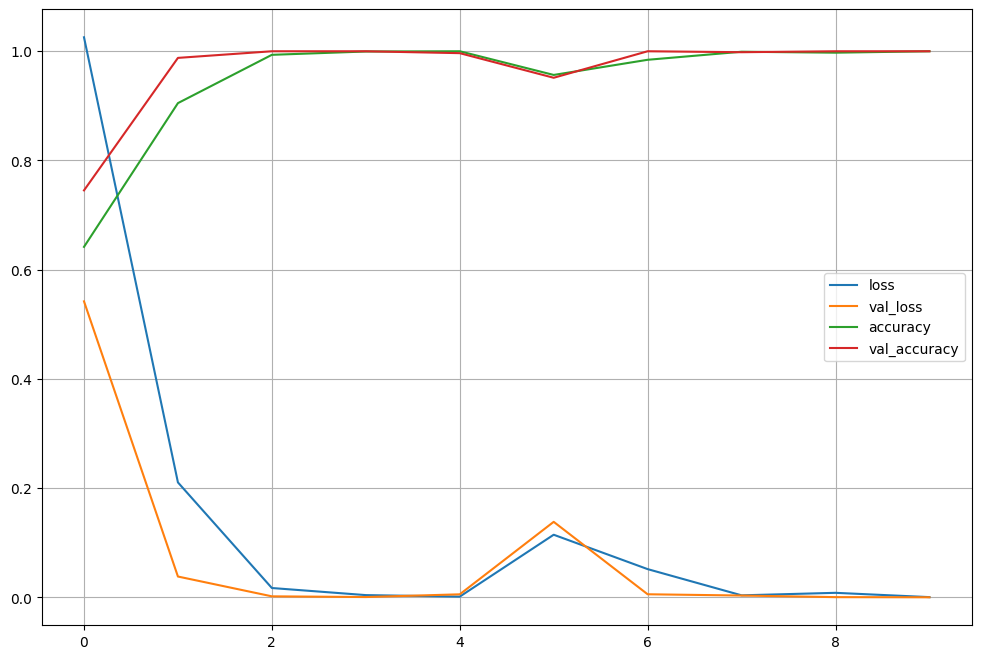

In [ ]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

19/19 [==============================] - 7s 363ms/step


array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
wrong_result =[]

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
len(wrong_result)

0

In [ ]:
plt.figure(figsize =(14,12))

for idx, n in enumerate(wrong_result):
    plt.subplot(2, 4, idx +1)
    plt.imshow(X_test[n], cmap='Greys', interpolation='nearest')
    plt.title('Label :' + str(y_test[n])+ ' Predict :' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

<Figure size 1400x1200 with 0 Axes>

In [ ]:
model.save('/content/snack_model_3000')

In [ ]:
model.save('/content/drive/MyDrive/snack_model_copy1_3000')

In [ ]:
qimport cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np

# 딥 러닝 모델 로드
model = load_model('/content/drive/MyDrive/snack_model')  # 모델 파일의 경로를 지정

# 웹캠 열기
cap = cv2.VideoCapture(0)

while True:
    # 웹캠에서 프레임 읽기
    ret, frame = cap.read()

    # 전처리: 크기 조정 등 모델의 입력에 맞게 프레임을 전처리해야 함
    # 이 부분은 모델이 학습된 입력 형식에 맞게 적절히 수정해주세요.
    processed_frame = cv2.resize(frame, (180, 220))
    processed_frame = processed_frame / 255.0  # 모델이 학습할 때 정규화되었는지 확인

    # 모델 예측
    input_array = np.expand_dims(processed_frame, axis=0)  # 모델은 배치 차원을 기대하므로 차원 확장
    predictions = model.predict(input_array)

    # 예측 결과
    # 이 부분은 예측 결과를 어떻게 처리할지에 따라 수정해야 합니다.
    # 여기서는 간단하게 클래스별로 확률을 출력합니다.
    class_probabilities = predictions[0]
    class_index = np.argmax(class_probabilities)
    class_label = f"Class: {class_index}, Probability: {class_probabilities[class_index]:.4f}"

    # 결과를 화면에 출력
    cv2.putText(frame, class_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # 화면에 프레임 표시
    cv2.imshow('Webcam', frame)

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 웹캠 해제 및 창 닫기
cap.release()
cv2.destroyAllWindows()